In [1]:
import cv2
import matplotlib.pyplot as plt
import skimage
import itertools
import numpy as np
import os
import sklearn

In [1]:
from repo.windows import *

In [2]:
img = cv2.imread("s.png", 0)[620:2790]

In [2]:
windows = getWindows(img=img, windowL=13)

In [3]:
windows.shape

(2864, 13, 13)

In [3]:
windows, clusters, clusteredWindows = getClusteredWindows(img=img, windowL=13, clustersNum=5)

In [4]:
windows.shape, clusters.shape, clusteredWindows.shape

((2864, 13, 13), (2864,), (5, 13, 13))

In [21]:
img_paths = os.listdir('forms')
img_paths[51][4:7]


'102'

In [17]:
freq = np.zeros(650,dtype=int)
for i in img_paths:
    freq[int(i[4:7])]+=1

In [18]:
freq

array([48,  0,  2, 22, 17,  6,  6, 23, 14, 10,  7, 27, 14,  8, 16,  8, 13,
       13, 25, 11, 15, 13, 15,  9,  9, 11, 31, 12, 13,  4, 19, 23, 11,  9,
        7, 11,  7, 26, 11, 13, 10,  3, 26, 14,  9, 24,  7, 25,  5, 16, 29,
        4, 12, 15,  7,  5,  8, 10, 11,  9,  9,  7, 13, 10,  6,  7, 15,  7,
        7, 10,  8, 10, 10,  5,  8, 11, 10,  5,  7, 11, 11, 17, 14,  8, 15,
        8,  7, 17,  6, 12,  9,  8,  9,  9, 12,  8, 19,  5, 12,  4, 11,  7,
        9, 10,  8,  6,  8,  7,  3,  7,  7,  9,  5,  9,  6,  7,  5,  8,  5,
        6,  3,  7,  5,  3,  4,  4,  3,  5,  7,  1,  3,  6,  5,  2,  4,  4,
        4,  2,  4,  4,  2,  3,  2,  3,  3,  1,  3,  5,  1,  3,  2,  2,  4,
        1,  2,  2,  4,  4,  2,  1,  2,  0,  1,  5,  2,  1,  1,  0,  1,  3,
        2,  1,  1,  2,  3,  2,  2,  0,  0,  2,  2,  3,  2,  1,  0,  2,  1,
        3,  0,  1,  3,  1,  0,  0,  1,  3,  0,  0,  0,  1,  1,  1,  2,  0,
        0,  0,  0,  0,  1,  2,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,
        0,  1,  0,  0,  0

In [27]:
with open("forms.txt") as h:
    lines = h.readlines()[16:]

In [72]:
freq = np.zeros(680, dtype=int)
formWriter = {}
for i in lines:
    line = i.split(' ')
    key = line[1]
    if key in formWriter.keys():
        formWriter[key].append(line[0])
    else:
        formWriter[key] = [line[0]]

In [73]:
formWriter

{'000': ['a01-000u',
  'a01-003u',
  'a01-007u',
  'a01-011u',
  'a01-014u',
  'a01-020u',
  'a01-026u',
  'a01-030u',
  'a01-043u',
  'a01-049u',
  'a01-049x',
  'a01-053u',
  'a01-058u',
  'a01-063u',
  'a01-068u',
  'a01-072u',
  'a01-077u',
  'a01-082u',
  'a01-087u',
  'a01-091u',
  'a01-096u',
  'a01-102u',
  'a01-107u',
  'a01-113u',
  'a01-117u',
  'a01-122u',
  'a01-128u',
  'a01-132u',
  'a01-132x',
  'a03-050',
  'a03-071',
  'a03-073',
  'a03-080',
  'a03-089',
  'a05-000',
  'a05-013',
  'a05-017',
  'a05-022',
  'a05-025',
  'a05-029',
  'a05-039',
  'a05-044',
  'a05-048',
  'a05-053',
  'a05-058',
  'a05-062',
  'a05-069',
  'a05-073',
  'a05-080',
  'a05-084',
  'a05-089',
  'a05-094',
  'a05-099',
  'a05-104',
  'a05-108',
  'a05-113',
  'a05-116',
  'a05-121',
  'a05-125'],
 '001': ['a01-000x', 'a01-072x'],
 '002': ['a01-003'],
 '003': ['a01-003x', 'a01-007x'],
 '004': ['a01-007'],
 '005': ['a01-011', 'a01-030'],
 '006': ['a01-011x'],
 '007': ['a01-014', 'a01-038'],


In [74]:
for key, forms in formWriter.items():
    if len(forms) == 1:
        addtoTrain(forms, key)
    else:
        addtoTrain(forms[:2], key)
        addtoTest(forms[2:], key)

forms\a01-000u
forms\a01-003u
forms\a01-000x
forms\a01-072x
forms\a01-003x
forms\a01-007x
forms\a01-011
forms\a01-030
forms\a01-014
forms\a01-038
forms\a01-014x
forms\a01-026x
forms\a01-020
forms\a01-026
forms\a01-020x
forms\a01-030x
forms\a01-038x
forms\a01-043x
forms\a01-043
forms\a01-049
forms\a01-053
forms\a01-058
forms\a01-053x
forms\a01-058x
forms\a01-077
forms\a01-091
forms\a01-087
forms\b01-057
forms\a01-107
forms\a01-113
forms\a01-117
forms\a01-122
forms\a02-017
forms\a02-020
forms\a02-037
forms\a02-042
forms\a02-102
forms\a02-106
forms\a04-000
forms\a04-003
forms\a04-015
forms\a04-019
forms\a04-031
forms\a04-035
forms\a04-047
forms\a04-050
forms\a04-066
forms\a04-069
forms\a04-081
forms\a04-085
forms\a04-092
forms\a04-096
forms\a05-004
forms\a05-009
forms\a06-000
forms\a06-004
forms\a06-100
forms\n02-146
forms\a06-119
forms\a06-128
forms\a06-124
forms\a06-134
forms\b01-000
forms\b01-004
forms\b01-014
forms\b01-018
forms\b01-027
forms\b01-033
forms\b01-044
forms\b01-049
forms\

forms\n04-092
forms\n04-130
forms\n04-139
forms\n04-171
forms\n04-183
forms\n04-202
forms\n04-209
forms\n06-074
forms\n06-082
forms\p02-069
forms\p02-090
forms\p02-076
forms\p02-081
forms\p06-030
forms\p06-042
forms\p06-242
forms\p06-248
forms\r03-002
forms\r03-007
forms\r06-035
forms\r06-041
forms\r06-090
forms\r06-097


In [65]:
def addtoTrain(filenames, writer):
    if len(filenames)==1:
        img = cv2.imread(os.path.join('forms', filenames[0])+'.png', 0)[620:2790]
        img1 = img[:img.shape[0]//2]
        img2 = img[img.shape[0]//2:]
        outputPath = os.path.join('train', writer+'-1.jpg')
        cv2.imwrite(outputPath, img1)
        outputPath = os.path.join('train', writer+'-2.jpg')
        cv2.imwrite(outputPath, img2)
    else:
        for i in range(len(filenames)):
            print(os.path.join('forms', filenames[i]))
            img = cv2.imread(os.path.join('forms', filenames[i])+'.png', 0)[620:2790]
            outputPath = os.path.join('train', writer+'-'+str(i)+'.jpg')
            cv2.imwrite(outputPath, img)

In [66]:
def addtoTest(filenames, writer):
    for i in range(len(filenames)):
        img = cv2.imread(os.path.join('forms', filenames[i])+'.png', 0)[620:2790]
        outputPath = os.path.join('test', writer+'-'+str(i)+'.jpg')
        cv2.imwrite(outputPath, img)

In [68]:
str(i)

'r06-143 635 5 all 5 5 55 55\n'

In [132]:
img = cv2.imread('forms/a02-004.png', 0)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(img, low_threshold, high_threshold)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100  # minimum number of pixels making up a line
max_line_gap = 0  # maximum gap in pixels between connectable line segments
line_image = np.zeros_like(img)  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
    
# Draw the lines on the  image
# lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)

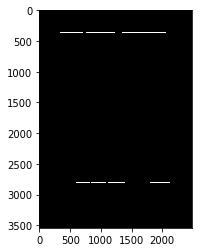

In [133]:
plt.imshow(line_image, 'gray')